# Sanity Test the Code
Verify that all essential simulation functions do what they should.

In [28]:
import os
os.chdir(os.path.join(os.getcwd(), "../code"))
import numpy as np
from parameters import Params
from simulation import Simulation
import matplotlib.pyplot as plt
from environment import Environment
from visualization import visualize_state

params = Params.from_json('parameters.json')
params.save = False
params.size = 20
params.num_food = 2
params.population_size = 3
params.iterations_per_epoch = 7
environment = Environment(params)
folder = 'None'

In [29]:
sim = Simulation(params, params.agent)
fitnesses = sim.run(folder)
print(fitnesses)

[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


In [30]:
print(sim.data['ate'].shape)
print(sim.data['x_position'].shape)
print(sim.data['y_position'].shape)
print(sim.data['direction'].shape)

(7, 10, 3)
(7, 10, 3)
(7, 10, 3)
(7, 10, 3)


In [31]:
assert(max(sim.data['ate'].values.flatten()) <= 1)
assert(min(sim.data['ate'].values.flatten()) == 0)
assert(max(sim.data['x_position'].values.flatten()) <= params.size)
assert(min(sim.data['x_position'].values.flatten()) >= 0)
assert(max(sim.data['y_position'].values.flatten()) <= params.size)
assert(min(sim.data['y_position'].values.flatten()) >= 0)
assert(max(sim.data['direction'].values.flatten()) <= 2*np.pi)
assert(min(sim.data['direction'].values.flatten()) >= 0)

Visually verify that agents recorded positions also align with actual agent positions

[1.13288912 1.59372099 5.05898871]
[19.13027834 14.6857549   7.07751937]
[1.87352445 0.94616024 1.84219174]


<Axes: title={'center': 'Foraging Simulation Environment'}, xlabel='X', ylabel='Y'>

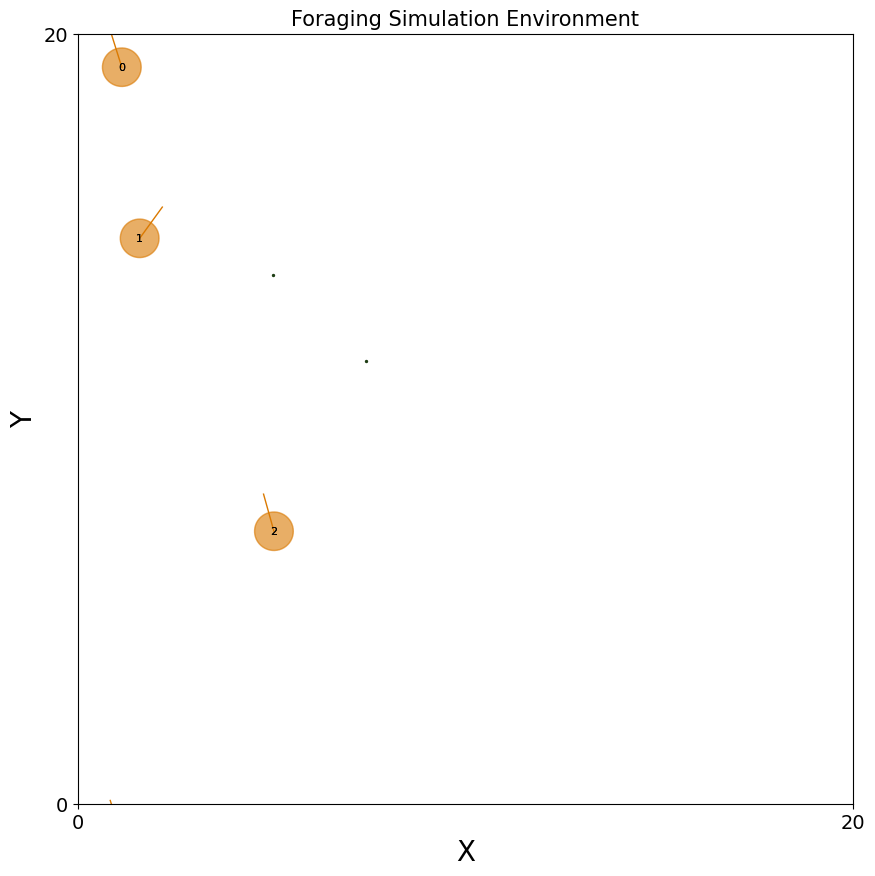

In [32]:
del sim
sim = Simulation(params, params.agent)
population = sim.run_epoch(sim.set_up_population(None), environment)

print(sim.data['x_position'].values[params.iterations_per_epoch - 1][params.total_time])
print(sim.data['y_position'].values[params.iterations_per_epoch - 1][params.total_time])
print(sim.data['direction'].values[params.iterations_per_epoch - 1][params.total_time])

visualize_state(environment, population)